# Assignment 1: Machine Learning Lab
### Data Pre-Processing
#### Importing libraries and packages

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

Importing datasets

In [2]:
df1 = pd.read_csv('./data/changes-visitors-covid.csv')
df1 = df1[df1.Entity == "India"]
df1.rename(columns = {'Entity': 'location', 'Code':'iso_code', 'Day':'date'}, inplace = True)
print(df1.shape)
df1.head()

(471, 9)


,location,iso_code,date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
23897,India,IND,2020-02-17,0.667,1.667,0.000,2.000,3.000,3.000
23898,India,IND,2020-02-18,0.500,1.750,0.000,2.000,3.250,3.000
23899,India,IND,2020-02-19,0.400,1.800,0.200,1.800,2.800,3.200
23900,India,IND,2020-02-20,0.500,2.000,0.000,2.333,3.167,3.333
23901,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143


In [3]:
df2 = pd.read_csv('./data/covid-data.csv', usecols = ['iso_code', 'continent', 'location', 'date', 'new_cases'])
df2 = df2[df2.iso_code == 'IND']
print(df2.head(5))
print(df2.shape)

      iso_code continent location        date  new_cases
38584      IND      Asia    India  2020-01-30        1.0
38585      IND      Asia    India  2020-01-31        0.0
38586      IND      Asia    India  2020-02-01        0.0
38587      IND      Asia    India  2020-02-02        1.0
38588      IND      Asia    India  2020-02-03        1.0
(491, 5)


In [4]:
covid_data = pd.merge(df1, df2, on = ['date', 'location', 'iso_code'])
covid_data.head()

,location,iso_code,date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,continent,new_cases
0,India,IND,2020-02-17,0.667,1.667,0.000,2.000,3.000,3.000,Asia,0.0
1,India,IND,2020-02-18,0.500,1.750,0.000,2.000,3.250,3.000,Asia,0.0
2,India,IND,2020-02-19,0.400,1.800,0.200,1.800,2.800,3.200,Asia,0.0
3,India,IND,2020-02-20,0.500,2.000,0.000,2.333,3.167,3.333,Asia,0.0
4,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143,Asia,0.0


In [5]:
covid_data.nunique()
#since there are only unique values in 'location', 'iso_code', 'continent' we can drop these columns

location                   1
iso_code                   1
date                     471
retail_and_recreation    262
grocery_and_pharmacy     268
residential              143
transit_stations         270
parks                    254
workplaces               253
continent                  1
new_cases                448
dtype: int64

In [6]:
covid_data = covid_data.drop(['location', 'iso_code', 'continent'], axis = 1)
covid_data.head(1)

,date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
0,2020-02-17,0.667,1.667,0.0,2.0,3.0,3.0,0.0


### Data Cleaning

In [7]:
mobility_columns = ['retail_and_recreation', 'grocery_and_pharmacy', 'residential' ,'transit_stations' ,'parks','workplaces']

In [8]:
covid_data.dtypes

date                      object
retail_and_recreation    float64
grocery_and_pharmacy     float64
residential              float64
transit_stations         float64
parks                    float64
workplaces               float64
new_cases                float64
dtype: object

In [9]:
#checking for any null values
covid_data.isnull().sum(axis = 0)

date                     0
retail_and_recreation    0
grocery_and_pharmacy     0
residential              0
transit_stations         0
parks                    0
workplaces               0
new_cases                0
dtype: int64

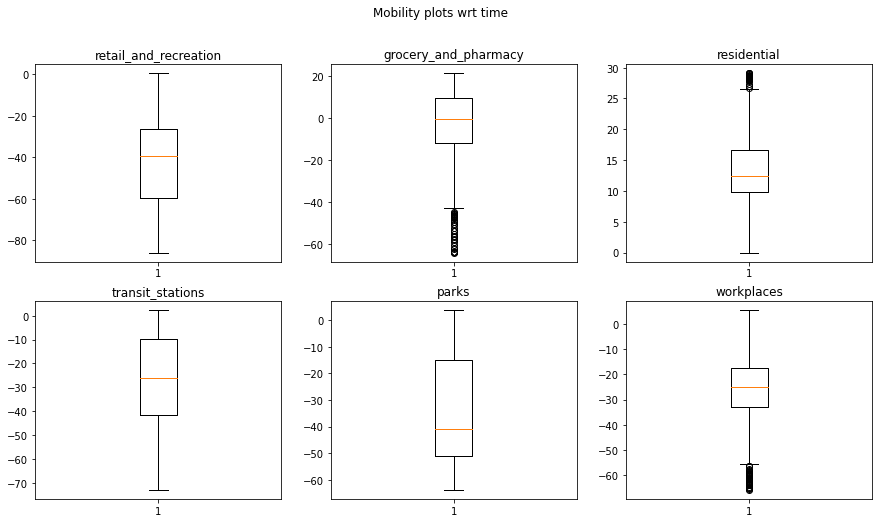

In [10]:
fig, plots = plt.subplots(2, 3)
fig.set_figheight(8)
fig.set_figwidth(15)
fig.suptitle('Mobility plots wrt time')
for i, column in enumerate(mobility_columns):
    ax = plots[i//3][i%3]
    ax.boxplot(covid_data[column])
    ax.set_title(column)

No null values exist in our dataset

### Saving the clean data for separate use in model.py

In [11]:
covid_data.to_csv('./data/covid_data_india.csv',index = False)

In [12]:
# visualizing the dataset

<AxesSubplot:>

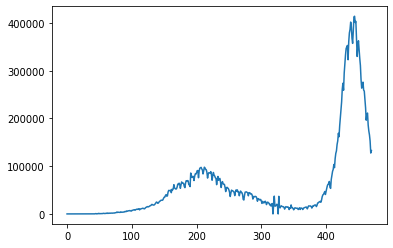

In [13]:
covid_data.new_cases.plot()
# we can see that the target column is basically a time series which has to be predicted, 
# given the corresponding mobility data.
# this is indeed the actual data that can we verified from google. (this statement is logical pertaining to this scenario only)

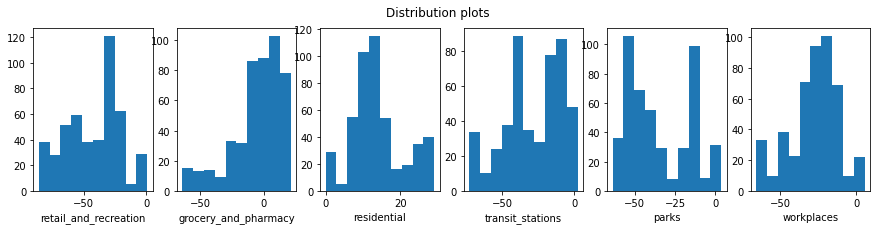

In [14]:
fig, plots = plt.subplots(1,6)
fig.set_figheight(3)
fig.set_figwidth(15)
fig.suptitle('Distribution plots')
for i, column in enumerate(mobility_columns):
    plots[i].hist(covid_data[column])
    plots[i].set_xlabel(column)
#     plots[i].xlabel(column)

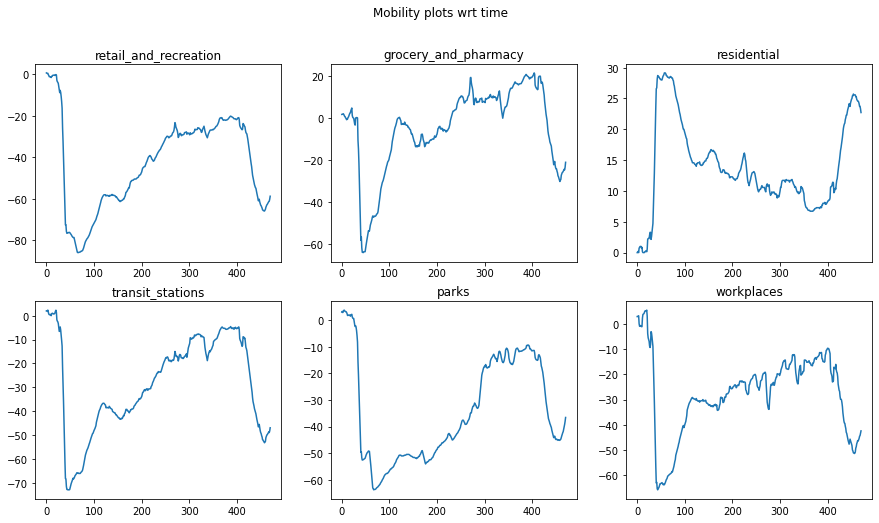

In [15]:
fig, plots = plt.subplots(2, 3)
fig.set_figheight(8)
fig.set_figwidth(15)
fig.suptitle('Mobility plots wrt time')
for i, column in enumerate(mobility_columns):
    ax = plots[i//3][i%3]
    ax.plot(covid_data[column])
    ax.set_title(column)

we can see that the plots follow similar trends wrt time axis. Plot[1][3] is however following a trend that seems to be reverse of others. This should obviously be because people preferred staying at home due to the scenario. Also looking at residential and workspace closely, the trends seem to be almost mirror images of each other.  
Also we have to consider that in all cases 0 or a number slightly higher than 0 must have been the base line quantity in the pre covid era

In [16]:
# correlation matrix for dataset
covid_data.corr()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
retail_and_recreation,1.000000,0.820786,-0.925891,0.970580,0.906370,0.928552,-0.134351
grocery_and_pharmacy,0.820786,1.000000,-0.840430,0.913562,0.664009,0.867805,-0.052792
residential,-0.925891,-0.840430,1.000000,-0.928817,-0.768427,-0.969960,0.313037
transit_stations,0.970580,0.913562,-0.928817,1.000000,0.880851,0.951951,-0.153770
parks,0.906370,0.664009,-0.768427,0.880851,1.000000,0.794867,-0.119766
workplaces,0.928552,0.867805,-0.969960,0.951951,0.794867,1.000000,-0.232405
new_cases,-0.134351,-0.052792,0.313037,-0.153770,-0.119766,-0.232405,1.000000


#### import self written modules

In [288]:
from utils import train_test_split
from utils import R2_score
from KMeans import KMeansClustering 
from decision_tree_regressor import DecisionTreeRegressor 

ImportError: cannot import name 'R2_score' from 'utils' (/mnt/d/acer/Projects/Machine-Learning/assignment1/utils.py)

In [284]:
# importing dataset removing the date column
df = pd.read_csv("./data/covid_data_india.csv").iloc[:,1:]
print("shape of dataset: {}".format(df.shape))
df.head()

shape of dataset: (471, 7)


,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
0,0.667,1.667,0.000,2.000,3.000,3.000,0.0
1,0.500,1.750,0.000,2.000,3.250,3.000,0.0
2,0.400,1.800,0.200,1.800,2.800,3.200,0.0
3,0.500,2.000,0.000,2.333,3.167,3.333,0.0
4,-0.143,1.714,0.714,1.429,3.571,0.143,0.0


In [315]:
np.random.seed(5)
train_df, test_df = train_test_split(df, test_size = 10, shuffle = True)
print(train_df.shape, test_df.shape)

(425, 7) (47, 7)


In [316]:
train_df.head()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
466,-61.714,-25.000,24.143,-49.143,-41.000,-45.429,173790.0
145,-58.714,-6.571,15.143,-41.143,-51.000,-31.143,28606.0
327,-27.429,9.429,11.429,-8.571,-14.857,-12.571,36867.0
433,-48.571,-6.286,20.143,-34.429,-36.000,-37.000,352991.0
247,-32.429,9.429,12.857,-19.429,-41.143,-20.000,55839.0


## Creating a decistion tree using ID3-A algorithm
> We have implemented ID3-A algorithm in decistion_tree_regressor.py python file

In [317]:
regressor = DecisionTreeRegressor(train_df, min_samples = 5, max_depth = 17)
tree = regressor.build_tree(train_df)

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 5 and value -8.4285; Std Dev reduced from 4.810289896553937 to 2.2973414586817036
Splitting wrt column 5 and value -4.5715; Std Dev reduced from 2.

Splitting wrt column 2 and value 11.286000000000001; Std Dev reduced from 6753.9399700748745 to 5136.501021124885
Splitting wrt column 2 and value 10.214500000000001; Std Dev reduced from 2381.2864167084144 to 2077.7433838823144
Splitting wrt column 4 and value -15.0715; Std Dev reduced from 2076.1943010012824 to 1323.5214778571046
Splitting wrt column 3 and value -18.357; Std Dev reduced from 489.06727553578963 to 304.6122781504383
Splitting wrt column 2 and value 9.9285; Std Dev reduced from 1787.1071458133906 to 1353.6126349599642
Splitting wrt column 4 and value -13.786; Std Dev reduced from 1634.0733878056683 to 1271.1360358273375
Splitting wrt column 1 and value 5.5; Std Dev reduced from 2079.7149439127193 to 1557.19625090253
Splitting wrt column 4 and value -10.6425; Std Dev reduced from 1789.5731955475367 to 1267.8592777387198
Splitting wrt column 4 and value -11.214; Std Dev reduced from 1426.3416874560598 to 1127.9074790291977
Splitting wrt column 2 and value 10.9285; Std Dev

In [318]:
print("Training R_squared: {}\nTest R_squared: {}".format(regressor.r_squared(train_df, tree), regressor.r_squared(test_df, tree)))

Training R_squared: 0.9975977312695716
Test R_squared: 0.9965915916097943


## Visualizing our model's outcomes

#### Plotting train_df

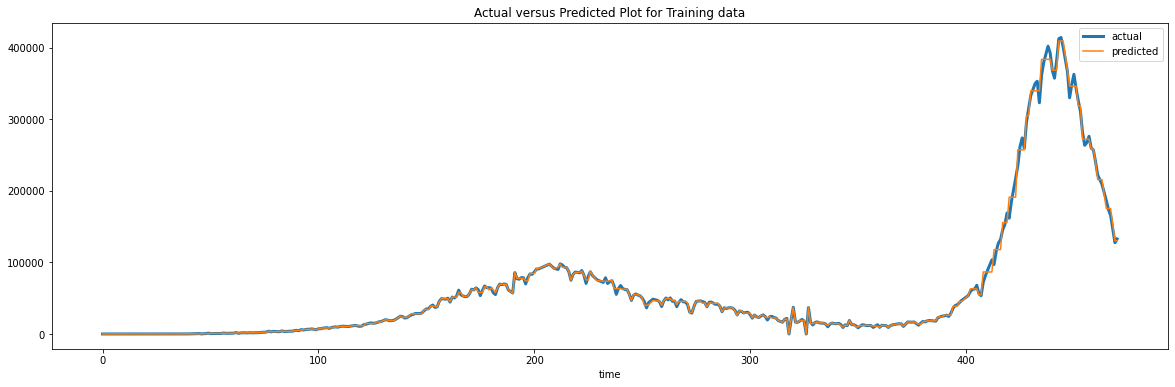

In [319]:
actual_values = train_df.iloc[:,-1].sort_index()
predicted_values = train_df.apply(regressor.predict_sample, axis = 1, args = (tree,)).sort_index()
fig = plt.figure(figsize = (20,6))
plt.plot(actual_values, linewidth = 3, label = "actual")
plt.plot(predicted_values, label = "predicted")
plt.legend()
plt.xlabel("time")
title = "Actual versus Predicted Plot for Training data"
plt.title(title)
plt.savefig("./plots/{}.png".format(title))
plt.show()

### Plotting Actual V/s Predicted for Test Data

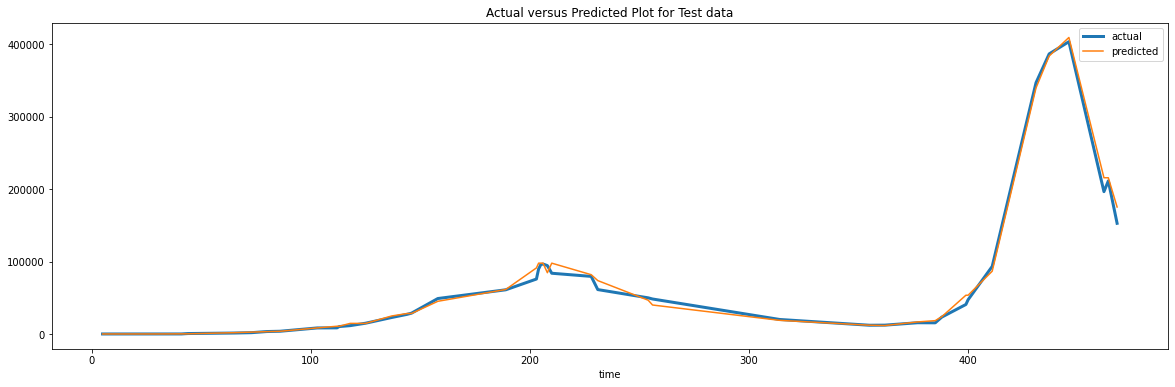

In [320]:
actual_values = test_df.iloc[:,-1].sort_index()
predicted_values = test_df.apply(regressor.predict_sample, axis = 1, args = (tree,)).sort_index()
fig = plt.figure(figsize = (20,6))
plt.plot(actual_values, linewidth = 3, label = "actual")
plt.plot(predicted_values, label = "predicted")
plt.legend()
plt.xlabel("time")
title = "Actual versus Predicted Plot for Test data"
plt.title(title)
plt.savefig("./plots/{}.png".format(title))
plt.show()

In [321]:
grid_search = {"max_depth": [], "min_samples": [], "r_squared_train": [], "r_squared_val": []}
# grid_search = {"max_depth":[], "min_samples":[]}
for max_depth in range(5,20):
    for min_samples in range(3,20,4):
        regressor = DecisionTreeRegressor(train_df, min_samples = min_samples, max_depth = max_depth)
        tree = regressor.build_tree(train_df)
        
        r_squared_train = regressor.r_squared(train_df, tree)
        r_squared_val = regressor.r_squared(test_df, tree)
        
        grid_search["max_depth"].append(max_depth)
        grid_search["min_samples"].append(min_samples)
        grid_search["r_squared_train"].append(r_squared_train)
        grid_search["r_squared_val"].append(r_squared_val)
        
    print(f"Progress: Iteration {max_depth}/20")
        
grid_search = pd.DataFrame(grid_search)
grid_search.sort_values("r_squared_val", ascending=False).head()

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 3

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev redu

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev redu

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev redu

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -42.286; Std Dev reduced from 18731.67799413994 to 11063.289612544453
Splitting wrt column 2 and value 11.9285; Std Dev redu

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt column 4 and value -10.5715; Std Dev reduced

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -51.5715; Std Dev reduced from 6001.007373694432 to 4228.131581016852
Splitting wrt column 4 and value -42.286; Std Dev redu

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.8652032122228447
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 5 and value 3.1; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 5 and value -14.143; Std Dev re

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.8652032122228447
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 5 and value 3.1; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 5 a

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 5 and value -12.9285; Std Dev re

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -51.5715; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.86520321222

Splitting wrt column 3 and value -46.7855; Std Dev reduced from 91735.60236424506 to 63104.54330426781
Splitting wrt column 4 and value -44.0715; Std Dev reduced from 86938.33589420965 to 49164.9344947201
Splitting wrt column 3 and value -51.4285; Std Dev reduced from 39257.92015247655 to 14318.821844926253
Splitting wrt column 5 and value -49.0; Std Dev reduced from 12309.742221144212 to 7422.721720143756
Splitting wrt column 5 and value -51.0; Std Dev reduced from 8659.842006834382 to 5070.695096108735
Splitting wrt column 4 and value -45.0715; Std Dev reduced from 7043.042644163103 to 2269.25
Splitting wrt column 5 and value -49.143; Std Dev reduced from 16662.748072671966 to 10317.120718332437
Splitting wrt column 4 and value -44.7855; Std Dev reduced from 11743.681077498657 to 5828.87732543755
Splitting wrt column 5 and value -46.7145; Std Dev reduced from 7771.836433916733 to 1759.0
Splitting wrt column 5 and value -48.0; Std Dev reduced from 65263.832800865865 to 28902.915706075

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.8652032122228447
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt column 4 and value -10.5715; Std Dev reduced

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -51.5715; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 5 and value -8.4285; Std Dev reduced from 4.810289896553937 to 2.2973414586817036
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.86520321

Splitting wrt column 2 and value 11.5; Std Dev reduced from 9728.525361819002 to 6191.600348524977
Splitting wrt column 5 and value -13.3575; Std Dev reduced from 7114.231171374972 to 5175.012496340285
Splitting wrt column 5 and value -15.5715; Std Dev reduced from 41307.0553406265 to 24542.357051274157
Splitting wrt column 1 and value 16.0715; Std Dev reduced from 35334.65888820157 to 20136.276712737636
Splitting wrt column 5 and value -19.7145; Std Dev reduced from 17672.530171615683 to 8085.215004579663
Splitting wrt column 3 and value -12.286000000000001; Std Dev reduced from 11445.072506869496 to 5150.209134103197
Splitting wrt column 4 and value -14.0; Std Dev reduced from 22248.059462270743 to 11867.99139063535
Splitting wrt column 5 and value -18.5715; Std Dev reduced from 9813.816213210164 to 2498.333333333333
Splitting wrt column 5 and value -17.2145; Std Dev reduced from 13408.62277370424 to 5077.331201034654
Splitting wrt column 4 and value -11.3575; Std Dev reduced from 14

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.8652032122228447
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 

Splitting wrt column 5 and value -44.0; Std Dev reduced from 1905.8341898454005 to 913.8150176185673
Splitting wrt column 5 and value -46.4285; Std Dev reduced from 628.6205146821808 to 341.65237161509555
Splitting wrt column 5 and value -51.0715; Std Dev reduced from 392.5969434419988 to 319.0095115548635
Splitting wrt column 5 and value -39.0; Std Dev reduced from 1160.983586830102 to 593.9512715009253
Splitting wrt column 5 and value -40.4285; Std Dev reduced from 567.2048659875901 to 278.88037728601256
Splitting wrt column 5 and value -42.5; Std Dev reduced from 361.3077155363866 to 288.82122532946323
Splitting wrt column 3 and value -46.7855; Std Dev reduced from 91735.60236424506 to 63104.54330426781
Splitting wrt column 4 and value -44.0715; Std Dev reduced from 86938.33589420965 to 49164.9344947201
Splitting wrt column 3 and value -51.4285; Std Dev reduced from 39257.92015247655 to 14318.821844926253
Splitting wrt column 5 and value -49.0; Std Dev reduced from 12309.74222114421

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 5 and value -12.9285; Std Dev re

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev red

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -51.5715; Std Dev reduced from 6001.007373694432 to 4228.131581016852
Splitting wrt column 3 and value -39.143; Std Dev redu

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 5 and value -8.4285; Std Dev reduced from 4.810289896553937 to 2.2973414586

Splitting wrt column 2 and value 15.9285; Std Dev reduced from 5183.144956140397 to 4020.625905261691
Splitting wrt column 5 and value -23.5715; Std Dev reduced from 6408.75247339965 to 3066.0187090769296
Splitting wrt column 5 and value -27.3575; Std Dev reduced from 2409.114800595642 to 2008.2406345866693
Splitting wrt column 5 and value -27.643; Std Dev reduced from 3476.6877276447417 to 2158.333333333333
Splitting wrt column 4 and value -43.9285; Std Dev reduced from 906.9053147931155 to 403.63210352993485
Splitting wrt column 5 and value -21.7855; Std Dev reduced from 3722.9226175582176 to 3053.7885392266458
Splitting wrt column 5 and value -22.0; Std Dev reduced from 4862.624362162885 to 3595.3069931509326
Splitting wrt column 5 and value -21.6425; Std Dev reduced from 642.0074419783275 to 113.66666666666666
Splitting wrt column 5 and value -36.9285; Std Dev reduced from 8911.03017240203 to 6137.65025472602
Splitting wrt column 4 and value -39.286; Std Dev reduced from 6274.04248

Splitting wrt column 5 and value -44.0; Std Dev reduced from 1905.8341898454005 to 913.8150176185673
Splitting wrt column 5 and value -46.4285; Std Dev reduced from 628.6205146821808 to 341.65237161509555
Splitting wrt column 5 and value -51.0715; Std Dev reduced from 392.5969434419988 to 319.0095115548635
Splitting wrt column 5 and value -56.071; Std Dev reduced from 344.5933255302546 to 189.11615478324427
Splitting wrt column 5 and value -55.071; Std Dev reduced from 236.3951934790553 to 145.14776953160526
Splitting wrt column 5 and value -53.357; Std Dev reduced from 193.5303593754737 to 77.0
Splitting wrt column 5 and value -50.2855; Std Dev reduced from 293.4256975794724 to 129.52714001320342
Splitting wrt column 5 and value -48.4285; Std Dev reduced from 161.90892501650427 to 59.5
Splitting wrt column 5 and value -44.786; Std Dev reduced from 171.8371321920847 to 62.0
Splitting wrt column 5 and value -39.0; Std Dev reduced from 1160.983586830102 to 593.9512715009253
Splitting wrt

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.8652032122228447
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 

Splitting wrt column 3 and value -46.7855; Std Dev reduced from 91735.60236424506 to 63104.54330426781
Splitting wrt column 4 and value -44.0715; Std Dev reduced from 86938.33589420965 to 49164.9344947201
Splitting wrt column 3 and value -51.4285; Std Dev reduced from 39257.92015247655 to 14318.821844926253
Splitting wrt column 5 and value -49.0; Std Dev reduced from 12309.742221144212 to 7422.721720143756
Splitting wrt column 5 and value -48.0; Std Dev reduced from 65263.832800865865 to 28902.9157060754
Splitting wrt column 5 and value -44.0; Std Dev reduced from 33031.903664086174 to 15960.949341854015
Splitting wrt column 5 and value -38.8575; Std Dev reduced from 33662.79951669258 to 19739.14483310336
Splitting wrt column 5 and value -46.0; Std Dev reduced from 19594.6206507368 to 12266.644530991016
Splitting wrt column 5 and value -43.2145; Std Dev reduced from 14687.725385504727 to 12145.21461455525
Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 5 and value -12.9285; Std Dev re

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -51.5715; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 5 and value -8.4285; Std Dev reduced from 4.810289896553937 to 2.2973414586817036
Splitting wrt column 5 and value -4.5715; Std Dev reduced from 2.756809750418044 to 1.6970562

Splitting wrt column 4 and value -49.143; Std Dev reduced from 7158.392411626688 to 5975.128065465703
Splitting wrt column 5 and value -27.286; Std Dev reduced from 4277.05952776924 to 2629.4775185211533
Splitting wrt column 4 and value -49.7855; Std Dev reduced from 3067.7237716080126 to 2026.9557821079802
Splitting wrt column 5 and value -25.857; Std Dev reduced from 931.4336731619702 to 260.75
Splitting wrt column 4 and value -45.3575; Std Dev reduced from 6470.398055627172 to 4874.450136024855
Splitting wrt column 5 and value -25.2855; Std Dev reduced from 4613.246826696321 to 2892.540459985135
Splitting wrt column 4 and value -48.6425; Std Dev reduced from 1347.6500534881698 to 180.66666666666666
Splitting wrt column 5 and value -22.7855; Std Dev reduced from 3356.007581934224 to 2584.1845367542933
Splitting wrt column 2 and value 15.9285; Std Dev reduced from 5183.144956140397 to 4020.625905261691
Splitting wrt column 4 and value -45.143; Std Dev reduced from 3815.9872175420664 t

Splitting wrt column 1 and value -46.7855; Std Dev reduced from 101.60995686119217 to 60.68164759569149
Splitting wrt column 5 and value -59.857; Std Dev reduced from 60.94806532341011 to 15.333333333333332
Splitting wrt column 3 and value -66.0715; Std Dev reduced from 60.41522986797286 to 5.0
Splitting wrt column 5 and value -57.7145; Std Dev reduced from 183.9516844778058 to 16.0
Splitting wrt column 0 and value -77.0; Std Dev reduced from 365.63920399760195 to 242.85977002715669
Splitting wrt column 4 and value -49.2145; Std Dev reduced from 151.32158544709415 to 98.13369565150505
Splitting wrt column 3 and value -68.5715; Std Dev reduced from 110.4004076079432 to 73.71604552005773
Splitting wrt column 5 and value -63.7855; Std Dev reduced from 43.054471312512945 to 19.75158221510368
Splitting wrt column 5 and value -63.143; Std Dev reduced from 26.335442953471574 to 8.333333333333332
Splitting wrt column 5 and value -63.643; Std Dev reduced from 104.37761972760252 to 85.4012587729

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.8652032122228447
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 

Splitting wrt column 4 and value -44.0715; Std Dev reduced from 86938.33589420965 to 49164.9344947201
Splitting wrt column 3 and value -51.4285; Std Dev reduced from 39257.92015247655 to 14318.821844926253
Splitting wrt column 5 and value -49.0; Std Dev reduced from 12309.742221144212 to 7422.721720143756
Splitting wrt column 5 and value -48.0; Std Dev reduced from 65263.832800865865 to 28902.9157060754
Splitting wrt column 5 and value -44.0; Std Dev reduced from 33031.903664086174 to 15960.949341854015
Splitting wrt column 5 and value -38.8575; Std Dev reduced from 33662.79951669258 to 19739.14483310336
Splitting wrt column 5 and value -46.0; Std Dev reduced from 19594.6206507368 to 12266.644530991016
Splitting wrt column 5 and value -43.2145; Std Dev reduced from 14687.725385504727 to 12145.21461455525
Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 5 and value -12.9285; Std Dev re

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -51.5715; Std Dev reduced from 6001.007373694432 to 4228.131581016852
Splitting wrt column 3 and value -39.143; Std Dev redu

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 5 and value -8.4285; Std Dev reduced from 4.810289896553937 to 2.2973414586

Splitting wrt column 4 and value -39.286; Std Dev reduced from 6274.04248260882 to 4906.685326752925
Splitting wrt column 2 and value 13.0715; Std Dev reduced from 3054.049055377641 to 1634.493792947429
Splitting wrt column 5 and value -21.214; Std Dev reduced from 1906.909425105334 to 803.425029344853
Splitting wrt column 5 and value -20.5; Std Dev reduced from 964.1100352138236 to 637.6063675968113
Splitting wrt column 5 and value -20.286; Std Dev reduced from 797.0079594960141 to 586.0587641184117
Splitting wrt column 5 and value -20.0715; Std Dev reduced from 781.4116854912155 to 491.0
Splitting wrt column 4 and value -34.9285; Std Dev reduced from 5247.960429374687 to 4528.119910975762
Splitting wrt column 3 and value -18.7855; Std Dev reduced from 3790.686016042772 to 3194.768314458086
Splitting wrt column 5 and value -23.4285; Std Dev reduced from 1963.5136465021067 to 1095.3732705510924
Splitting wrt column 3 and value -19.2145; Std Dev reduced from 1248.2887842518207 to 48.666

Splitting wrt column 4 and value -44.0715; Std Dev reduced from 86938.33589420965 to 49164.9344947201
Splitting wrt column 3 and value -51.4285; Std Dev reduced from 39257.92015247655 to 14318.821844926253
Splitting wrt column 5 and value -49.0; Std Dev reduced from 12309.742221144212 to 7422.721720143756
Splitting wrt column 5 and value -51.0; Std Dev reduced from 8659.842006834382 to 5070.695096108735
Splitting wrt column 4 and value -45.0715; Std Dev reduced from 7043.042644163103 to 2269.25
Splitting wrt column 5 and value -49.143; Std Dev reduced from 16662.748072671966 to 10317.120718332437
Splitting wrt column 4 and value -44.7855; Std Dev reduced from 11743.681077498657 to 5828.87732543755
Splitting wrt column 5 and value -46.7145; Std Dev reduced from 7771.836433916733 to 1759.0
Splitting wrt column 5 and value -48.0; Std Dev reduced from 65263.832800865865 to 28902.9157060754
Splitting wrt column 5 and value -44.0; Std Dev reduced from 33031.903664086174 to 15960.949341854015

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.8652032122228447
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 5 and value 3.1; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 5 

Splitting wrt column 0 and value -66.0715; Std Dev reduced from 153478.867783907 to 36504.84204784699
Splitting wrt column 1 and value -43.857; Std Dev reduced from 2653.730886183661 to 1241.9091281764004
Splitting wrt column 4 and value -53.714; Std Dev reduced from 695.1473126842827 to 406.91082558814975
Splitting wrt column 5 and value -58.857; Std Dev reduced from 465.87028500321804 to 244.2897059444296
Splitting wrt column 1 and value -47.2145; Std Dev reduced from 260.74552998078155 to 197.23346107337542
Splitting wrt column 0 and value -77.0; Std Dev reduced from 365.63920399760195 to 242.85977002715669
Splitting wrt column 4 and value -49.2145; Std Dev reduced from 151.32158544709415 to 98.13369565150505
Splitting wrt column 3 and value -68.5715; Std Dev reduced from 110.4004076079432 to 73.71604552005773
Splitting wrt column 0 and value -75.857; Std Dev reduced from 317.7546483199351 to 250.0742633027435
Splitting wrt column 4 and value -51.9285; Std Dev reduced from 324.39944

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt column 4 and value -10.5715; Std Dev reduced

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev red

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -51.5715; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 5 and value -8.4285; Std Dev reduced from 4.810289896553937 to 2.2973414586

Splitting wrt column 4 and value -39.286; Std Dev reduced from 6274.04248260882 to 4906.685326752925
Splitting wrt column 2 and value 13.0715; Std Dev reduced from 3054.049055377641 to 1634.493792947429
Splitting wrt column 5 and value -21.214; Std Dev reduced from 1906.909425105334 to 803.425029344853
Splitting wrt column 5 and value -20.5; Std Dev reduced from 964.1100352138236 to 637.6063675968113
Splitting wrt column 5 and value -20.286; Std Dev reduced from 797.0079594960141 to 586.0587641184117
Splitting wrt column 5 and value -20.0715; Std Dev reduced from 781.4116854912155 to 491.0
Splitting wrt column 4 and value -34.9285; Std Dev reduced from 5247.960429374687 to 4528.119910975762
Splitting wrt column 3 and value -18.7855; Std Dev reduced from 3790.686016042772 to 3194.768314458086
Splitting wrt column 5 and value -23.4285; Std Dev reduced from 1963.5136465021067 to 1095.3732705510924
Splitting wrt column 3 and value -19.2145; Std Dev reduced from 1248.2887842518207 to 48.666

Splitting wrt column 1 and value -64.0715; Std Dev reduced from 222.49244681311964 to 40.666666666666664
Splitting wrt column 5 and value -63.3575; Std Dev reduced from 294.21420767869114 to 24.0
Splitting wrt column 5 and value -64.286; Std Dev reduced from 51.87377843273891 to 20.0
Splitting wrt column 5 and value -44.0; Std Dev reduced from 1905.8341898454005 to 913.8150176185673
Splitting wrt column 5 and value -46.4285; Std Dev reduced from 628.6205146821808 to 341.65237161509555
Splitting wrt column 5 and value -51.0715; Std Dev reduced from 392.5969434419988 to 319.0095115548635
Splitting wrt column 5 and value -56.071; Std Dev reduced from 344.5933255302546 to 189.11615478324427
Splitting wrt column 5 and value -55.071; Std Dev reduced from 236.3951934790553 to 145.14776953160526
Splitting wrt column 5 and value -53.357; Std Dev reduced from 193.5303593754737 to 77.0
Splitting wrt column 5 and value -50.2855; Std Dev reduced from 293.4256975794724 to 129.52714001320342
Splittin

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.8652032122228447
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 

Splitting wrt column 5 and value -44.0; Std Dev reduced from 1905.8341898454005 to 913.8150176185673
Splitting wrt column 5 and value -46.4285; Std Dev reduced from 628.6205146821808 to 341.65237161509555
Splitting wrt column 5 and value -51.0715; Std Dev reduced from 392.5969434419988 to 319.0095115548635
Splitting wrt column 5 and value -39.0; Std Dev reduced from 1160.983586830102 to 593.9512715009253
Splitting wrt column 5 and value -40.4285; Std Dev reduced from 567.2048659875901 to 278.88037728601256
Splitting wrt column 5 and value -42.5; Std Dev reduced from 361.3077155363866 to 288.82122532946323
Splitting wrt column 3 and value -46.7855; Std Dev reduced from 91735.60236424506 to 63104.54330426781
Splitting wrt column 4 and value -44.0715; Std Dev reduced from 86938.33589420965 to 49164.9344947201
Splitting wrt column 3 and value -51.4285; Std Dev reduced from 39257.92015247655 to 14318.821844926253
Splitting wrt column 5 and value -49.0; Std Dev reduced from 12309.74222114421

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt column 4 and value -10.5715; Std Dev reduced

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -51.5715; Std Dev reduced from 6001.007373694432 to 4228.131581016852
Splitting wrt column 3 and value -39.143; Std Dev redu

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 5 and value -8.4285; Std Dev reduced from 4.810289896553937 to 2.2973414586817036
Splitting wrt column 5 and value -4.5715; Std Dev reduced from 2.756809750418044 to 1.6970562

Splitting wrt column 3 and value -25.857; Std Dev reduced from 10282.135215250351 to 6925.171097511609
Splitting wrt column 4 and value -49.143; Std Dev reduced from 7158.392411626688 to 5975.128065465703
Splitting wrt column 5 and value -27.286; Std Dev reduced from 4277.05952776924 to 2629.4775185211533
Splitting wrt column 4 and value -49.7855; Std Dev reduced from 3067.7237716080126 to 2026.9557821079802
Splitting wrt column 5 and value -25.857; Std Dev reduced from 931.4336731619702 to 260.75
Splitting wrt column 4 and value -45.3575; Std Dev reduced from 6470.398055627172 to 4874.450136024855
Splitting wrt column 5 and value -25.2855; Std Dev reduced from 4613.246826696321 to 2892.540459985135
Splitting wrt column 4 and value -48.6425; Std Dev reduced from 1347.6500534881698 to 180.66666666666666
Splitting wrt column 5 and value -22.7855; Std Dev reduced from 3356.007581934224 to 2584.1845367542933
Splitting wrt column 5 and value -24.714; Std Dev reduced from 2871.3161519492146 

Splitting wrt column 0 and value -66.0715; Std Dev reduced from 153478.867783907 to 36504.84204784699
Splitting wrt column 1 and value -43.857; Std Dev reduced from 2653.730886183661 to 1241.9091281764004
Splitting wrt column 4 and value -53.714; Std Dev reduced from 695.1473126842827 to 406.91082558814975
Splitting wrt column 5 and value -58.857; Std Dev reduced from 465.87028500321804 to 244.2897059444296
Splitting wrt column 1 and value -47.2145; Std Dev reduced from 260.74552998078155 to 197.23346107337542
Splitting wrt column 5 and value -60.786; Std Dev reduced from 311.98166612799537 to 255.20521879790437
Splitting wrt column 5 and value -61.357; Std Dev reduced from 396.0086979965073 to 174.33333333333331
Splitting wrt column 1 and value -46.7855; Std Dev reduced from 101.60995686119217 to 60.68164759569149
Splitting wrt column 5 and value -59.857; Std Dev reduced from 60.94806532341011 to 15.333333333333332
Splitting wrt column 3 and value -66.0715; Std Dev reduced from 60.415

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.8652032122228447
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 

Splitting wrt column 1 and value -43.857; Std Dev reduced from 2653.730886183661 to 1241.9091281764004
Splitting wrt column 4 and value -53.714; Std Dev reduced from 695.1473126842827 to 406.91082558814975
Splitting wrt column 5 and value -58.857; Std Dev reduced from 465.87028500321804 to 244.2897059444296
Splitting wrt column 1 and value -47.2145; Std Dev reduced from 260.74552998078155 to 197.23346107337542
Splitting wrt column 0 and value -77.0; Std Dev reduced from 365.63920399760195 to 242.85977002715669
Splitting wrt column 4 and value -49.2145; Std Dev reduced from 151.32158544709415 to 98.13369565150505
Splitting wrt column 3 and value -68.5715; Std Dev reduced from 110.4004076079432 to 73.71604552005773
Splitting wrt column 0 and value -75.857; Std Dev reduced from 317.7546483199351 to 250.0742633027435
Splitting wrt column 4 and value -51.9285; Std Dev reduced from 324.39944512899524 to 246.5283684307594
Splitting wrt column 5 and value -44.0; Std Dev reduced from 1905.83418

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt column 4 and value -10.5715; Std Dev reduced

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -51.5715; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 5 and value -8.4285; Std Dev reduced from 4.810289896553937 to 2.2973414586817036
Splitting wrt column 5 and value -4.5715; Std Dev reduced from 2.756809750418044 to 1.6970562

Splitting wrt column 3 and value -25.857; Std Dev reduced from 10282.135215250351 to 6925.171097511609
Splitting wrt column 4 and value -49.143; Std Dev reduced from 7158.392411626688 to 5975.128065465703
Splitting wrt column 5 and value -27.286; Std Dev reduced from 4277.05952776924 to 2629.4775185211533
Splitting wrt column 4 and value -49.7855; Std Dev reduced from 3067.7237716080126 to 2026.9557821079802
Splitting wrt column 5 and value -25.857; Std Dev reduced from 931.4336731619702 to 260.75
Splitting wrt column 4 and value -45.3575; Std Dev reduced from 6470.398055627172 to 4874.450136024855
Splitting wrt column 5 and value -25.2855; Std Dev reduced from 4613.246826696321 to 2892.540459985135
Splitting wrt column 4 and value -48.6425; Std Dev reduced from 1347.6500534881698 to 180.66666666666666
Splitting wrt column 5 and value -22.7855; Std Dev reduced from 3356.007581934224 to 2584.1845367542933
Splitting wrt column 5 and value -24.714; Std Dev reduced from 2871.3161519492146 

Splitting wrt column 0 and value -66.0715; Std Dev reduced from 153478.867783907 to 36504.84204784699
Splitting wrt column 1 and value -43.857; Std Dev reduced from 2653.730886183661 to 1241.9091281764004
Splitting wrt column 4 and value -53.714; Std Dev reduced from 695.1473126842827 to 406.91082558814975
Splitting wrt column 5 and value -58.857; Std Dev reduced from 465.87028500321804 to 244.2897059444296
Splitting wrt column 1 and value -47.2145; Std Dev reduced from 260.74552998078155 to 197.23346107337542
Splitting wrt column 5 and value -60.786; Std Dev reduced from 311.98166612799537 to 255.20521879790437
Splitting wrt column 5 and value -61.357; Std Dev reduced from 396.0086979965073 to 174.33333333333331
Splitting wrt column 1 and value -46.7855; Std Dev reduced from 101.60995686119217 to 60.68164759569149
Splitting wrt column 5 and value -59.857; Std Dev reduced from 60.94806532341011 to 15.333333333333332
Splitting wrt column 3 and value -66.0715; Std Dev reduced from 60.415

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.8652032122228447
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 

Splitting wrt column 4 and value -53.714; Std Dev reduced from 695.1473126842827 to 406.91082558814975
Splitting wrt column 5 and value -58.857; Std Dev reduced from 465.87028500321804 to 244.2897059444296
Splitting wrt column 1 and value -47.2145; Std Dev reduced from 260.74552998078155 to 197.23346107337542
Splitting wrt column 0 and value -77.0; Std Dev reduced from 365.63920399760195 to 242.85977002715669
Splitting wrt column 4 and value -49.2145; Std Dev reduced from 151.32158544709415 to 98.13369565150505
Splitting wrt column 3 and value -68.5715; Std Dev reduced from 110.4004076079432 to 73.71604552005773
Splitting wrt column 0 and value -75.857; Std Dev reduced from 317.7546483199351 to 250.0742633027435
Splitting wrt column 4 and value -51.9285; Std Dev reduced from 324.39944512899524 to 246.5283684307594
Splitting wrt column 5 and value -44.0; Std Dev reduced from 1905.8341898454005 to 913.8150176185673
Splitting wrt column 5 and value -46.4285; Std Dev reduced from 628.62051

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt column 4 and value -10.5715; Std Dev reduced

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -51.5715; Std Dev reduced from 6001.007373694432 to 4228.131581016852
Splitting wrt column 3 and value -39.143; Std Dev redu

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 5 and value -8.4285; Std Dev reduced from 4.810289896553937 to 2.2973414586

Splitting wrt column 3 and value -19.2145; Std Dev reduced from 1248.2887842518207 to 48.666666666666664
Splitting wrt column 0 and value -30.0715; Std Dev reduced from 3668.3278021334627 to 2960.0860293603146
Splitting wrt column 3 and value -17.6425; Std Dev reduced from 3733.5048770112335 to 613.3333333333333
Splitting wrt column 1 and value 10.214500000000001; Std Dev reduced from 2728.060375065039 to 2236.843696096352
Splitting wrt column 5 and value -24.0; Std Dev reduced from 1189.1674608733624 to 178.5675642439018
Splitting wrt column 5 and value -21.2145; Std Dev reduced from 238.09008565853574 to 76.33333333333333
Splitting wrt column 4 and value -37.4285; Std Dev reduced from 2935.294519578345 to 1930.655606575241
Splitting wrt column 5 and value -19.286; Std Dev reduced from 1440.9834098628617 to 857.25
Splitting wrt column 5 and value -32.786; Std Dev reduced from 5191.810416415453 to 4225.3773253860745
Splitting wrt column 3 and value -18.357; Std Dev reduced from 268.011

Splitting wrt column 5 and value -44.0; Std Dev reduced from 1905.8341898454005 to 913.8150176185673
Splitting wrt column 5 and value -46.4285; Std Dev reduced from 628.6205146821808 to 341.65237161509555
Splitting wrt column 5 and value -51.0715; Std Dev reduced from 392.5969434419988 to 319.0095115548635
Splitting wrt column 5 and value -56.071; Std Dev reduced from 344.5933255302546 to 189.11615478324427
Splitting wrt column 5 and value -55.071; Std Dev reduced from 236.3951934790553 to 145.14776953160526
Splitting wrt column 5 and value -53.357; Std Dev reduced from 193.5303593754737 to 77.0
Splitting wrt column 5 and value -50.2855; Std Dev reduced from 293.4256975794724 to 129.52714001320342
Splitting wrt column 5 and value -48.4285; Std Dev reduced from 161.90892501650427 to 59.5
Splitting wrt column 5 and value -44.786; Std Dev reduced from 171.8371321920847 to 62.0
Splitting wrt column 5 and value -39.0; Std Dev reduced from 1160.983586830102 to 593.9512715009253
Splitting wrt

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.8652032122228447
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 

Splitting wrt column 0 and value -66.0715; Std Dev reduced from 153478.867783907 to 36504.84204784699
Splitting wrt column 1 and value -43.857; Std Dev reduced from 2653.730886183661 to 1241.9091281764004
Splitting wrt column 4 and value -53.714; Std Dev reduced from 695.1473126842827 to 406.91082558814975
Splitting wrt column 5 and value -58.857; Std Dev reduced from 465.87028500321804 to 244.2897059444296
Splitting wrt column 1 and value -47.2145; Std Dev reduced from 260.74552998078155 to 197.23346107337542
Splitting wrt column 0 and value -77.0; Std Dev reduced from 365.63920399760195 to 242.85977002715669
Splitting wrt column 4 and value -49.2145; Std Dev reduced from 151.32158544709415 to 98.13369565150505
Splitting wrt column 3 and value -68.5715; Std Dev reduced from 110.4004076079432 to 73.71604552005773
Splitting wrt column 0 and value -75.857; Std Dev reduced from 317.7546483199351 to 250.0742633027435
Splitting wrt column 4 and value -51.9285; Std Dev reduced from 324.39944

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt column 4 and value -10.5715; Std Dev reduced

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -51.5715; Std Dev reduced from 6001.007373694432 to 4228.131581016852
Splitting wrt column 3 and value -39.143; Std Dev redu

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 5 and value -8.4285; Std Dev reduced from 4.810289896553937 to 2.2973414586

Splitting wrt column 4 and value -39.286; Std Dev reduced from 6274.04248260882 to 4906.685326752925
Splitting wrt column 2 and value 13.0715; Std Dev reduced from 3054.049055377641 to 1634.493792947429
Splitting wrt column 5 and value -21.214; Std Dev reduced from 1906.909425105334 to 803.425029344853
Splitting wrt column 5 and value -20.5; Std Dev reduced from 964.1100352138236 to 637.6063675968113
Splitting wrt column 5 and value -20.286; Std Dev reduced from 797.0079594960141 to 586.0587641184117
Splitting wrt column 5 and value -20.0715; Std Dev reduced from 781.4116854912155 to 491.0
Splitting wrt column 4 and value -34.9285; Std Dev reduced from 5247.960429374687 to 4528.119910975762
Splitting wrt column 3 and value -18.7855; Std Dev reduced from 3790.686016042772 to 3194.768314458086
Splitting wrt column 5 and value -23.4285; Std Dev reduced from 1963.5136465021067 to 1095.3732705510924
Splitting wrt column 3 and value -19.2145; Std Dev reduced from 1248.2887842518207 to 48.666

Splitting wrt column 3 and value -46.7855; Std Dev reduced from 91735.60236424506 to 63104.54330426781
Splitting wrt column 4 and value -44.0715; Std Dev reduced from 86938.33589420965 to 49164.9344947201
Splitting wrt column 3 and value -51.4285; Std Dev reduced from 39257.92015247655 to 14318.821844926253
Splitting wrt column 5 and value -49.0; Std Dev reduced from 12309.742221144212 to 7422.721720143756
Splitting wrt column 5 and value -51.0; Std Dev reduced from 8659.842006834382 to 5070.695096108735
Splitting wrt column 4 and value -45.0715; Std Dev reduced from 7043.042644163103 to 2269.25
Splitting wrt column 5 and value -49.143; Std Dev reduced from 16662.748072671966 to 10317.120718332437
Splitting wrt column 4 and value -44.7855; Std Dev reduced from 11743.681077498657 to 5828.87732543755
Splitting wrt column 5 and value -46.7145; Std Dev reduced from 7771.836433916733 to 1759.0
Splitting wrt column 5 and value -48.0; Std Dev reduced from 65263.832800865865 to 28902.915706075

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.8652032122228447
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 

Splitting wrt column 0 and value -77.0; Std Dev reduced from 365.63920399760195 to 242.85977002715669
Splitting wrt column 4 and value -49.2145; Std Dev reduced from 151.32158544709415 to 98.13369565150505
Splitting wrt column 3 and value -68.5715; Std Dev reduced from 110.4004076079432 to 73.71604552005773
Splitting wrt column 0 and value -75.857; Std Dev reduced from 317.7546483199351 to 250.0742633027435
Splitting wrt column 4 and value -51.9285; Std Dev reduced from 324.39944512899524 to 246.5283684307594
Splitting wrt column 5 and value -44.0; Std Dev reduced from 1905.8341898454005 to 913.8150176185673
Splitting wrt column 5 and value -46.4285; Std Dev reduced from 628.6205146821808 to 341.65237161509555
Splitting wrt column 5 and value -51.0715; Std Dev reduced from 392.5969434419988 to 319.0095115548635
Splitting wrt column 5 and value -39.0; Std Dev reduced from 1160.983586830102 to 593.9512715009253
Splitting wrt column 5 and value -40.4285; Std Dev reduced from 567.204865987

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt column 4 and value -10.5715; Std Dev reduced

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -51.5715; Std Dev reduced from 6001.007373694432 to 4228.131581016852
Splitting wrt column 3 and value -39.143; Std Dev redu

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 5 and value -8.4285; Std Dev reduced from 4.810289896553937 to 2.2973414586817036
Splitting wrt column 5 and value -4.5715; Std Dev reduced from 2.756809750418044 to 1.6970562

Splitting wrt column 4 and value -49.7855; Std Dev reduced from 3067.7237716080126 to 2026.9557821079802
Splitting wrt column 5 and value -25.857; Std Dev reduced from 931.4336731619702 to 260.75
Splitting wrt column 4 and value -45.3575; Std Dev reduced from 6470.398055627172 to 4874.450136024855
Splitting wrt column 5 and value -25.2855; Std Dev reduced from 4613.246826696321 to 2892.540459985135
Splitting wrt column 4 and value -48.6425; Std Dev reduced from 1347.6500534881698 to 180.66666666666666
Splitting wrt column 5 and value -22.7855; Std Dev reduced from 3356.007581934224 to 2584.1845367542933
Splitting wrt column 5 and value -24.714; Std Dev reduced from 2871.3161519492146 to 2111.3083175151596
Splitting wrt column 4 and value -47.1425; Std Dev reduced from 642.0437852843232 to 56.666666666666664
Splitting wrt column 1 and value -5.3575; Std Dev reduced from 2845.940583630578 to 1552.5444326634652
Splitting wrt column 5 and value -24.3575; Std Dev reduced from 2247.816648995

Splitting wrt column 1 and value -43.857; Std Dev reduced from 2653.730886183661 to 1241.9091281764004
Splitting wrt column 4 and value -53.714; Std Dev reduced from 695.1473126842827 to 406.91082558814975
Splitting wrt column 5 and value -58.857; Std Dev reduced from 465.87028500321804 to 244.2897059444296
Splitting wrt column 1 and value -47.2145; Std Dev reduced from 260.74552998078155 to 197.23346107337542
Splitting wrt column 5 and value -60.786; Std Dev reduced from 311.98166612799537 to 255.20521879790437
Splitting wrt column 5 and value -61.357; Std Dev reduced from 396.0086979965073 to 174.33333333333331
Splitting wrt column 1 and value -46.7855; Std Dev reduced from 101.60995686119217 to 60.68164759569149
Splitting wrt column 5 and value -59.857; Std Dev reduced from 60.94806532341011 to 15.333333333333332
Splitting wrt column 3 and value -66.0715; Std Dev reduced from 60.41522986797286 to 5.0
Splitting wrt column 5 and value -57.7145; Std Dev reduced from 183.9516844778058 t

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.8652032122228447
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 

Splitting wrt column 5 and value -44.0; Std Dev reduced from 1905.8341898454005 to 913.8150176185673
Splitting wrt column 5 and value -46.4285; Std Dev reduced from 628.6205146821808 to 341.65237161509555
Splitting wrt column 5 and value -51.0715; Std Dev reduced from 392.5969434419988 to 319.0095115548635
Splitting wrt column 5 and value -39.0; Std Dev reduced from 1160.983586830102 to 593.9512715009253
Splitting wrt column 5 and value -40.4285; Std Dev reduced from 567.2048659875901 to 278.88037728601256
Splitting wrt column 5 and value -42.5; Std Dev reduced from 361.3077155363866 to 288.82122532946323
Splitting wrt column 3 and value -46.7855; Std Dev reduced from 91735.60236424506 to 63104.54330426781
Splitting wrt column 4 and value -44.0715; Std Dev reduced from 86938.33589420965 to 49164.9344947201
Splitting wrt column 3 and value -51.4285; Std Dev reduced from 39257.92015247655 to 14318.821844926253
Splitting wrt column 5 and value -49.0; Std Dev reduced from 12309.74222114421

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt column 4 and value -10.5715; Std Dev reduced

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -51.5715; Std Dev reduced from 6001.007373694432 to 4228.131581016852
Splitting wrt column 3 and value -39.143; Std Dev redu

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 5 and value -8.0; Std Dev reduced from 18.0 to 8.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 5 and value -8.4285; Std Dev reduced from 4.810289896553937 to 2.2973414586

Splitting wrt column 5 and value -23.5715; Std Dev reduced from 6408.75247339965 to 3066.0187090769296
Splitting wrt column 5 and value -27.3575; Std Dev reduced from 2409.114800595642 to 2008.2406345866693
Splitting wrt column 5 and value -27.643; Std Dev reduced from 3476.6877276447417 to 2158.333333333333
Splitting wrt column 4 and value -43.9285; Std Dev reduced from 906.9053147931155 to 403.63210352993485
Splitting wrt column 4 and value -44.4285; Std Dev reduced from 538.1761380399131 to 19.666666666666664
Splitting wrt column 5 and value -21.7855; Std Dev reduced from 3722.9226175582176 to 3053.7885392266458
Splitting wrt column 5 and value -22.0; Std Dev reduced from 4862.624362162885 to 3595.3069931509326
Splitting wrt column 5 and value -22.857; Std Dev reduced from 4793.742657534577 to 2722.333333333333
Splitting wrt column 5 and value -21.6425; Std Dev reduced from 642.0074419783275 to 113.66666666666666
Splitting wrt column 5 and value -36.9285; Std Dev reduced from 8911.0

Splitting wrt column 5 and value -44.0; Std Dev reduced from 1905.8341898454005 to 913.8150176185673
Splitting wrt column 5 and value -46.4285; Std Dev reduced from 628.6205146821808 to 341.65237161509555
Splitting wrt column 5 and value -51.0715; Std Dev reduced from 392.5969434419988 to 319.0095115548635
Splitting wrt column 5 and value -56.071; Std Dev reduced from 344.5933255302546 to 189.11615478324427
Splitting wrt column 5 and value -55.071; Std Dev reduced from 236.3951934790553 to 145.14776953160526
Splitting wrt column 5 and value -53.357; Std Dev reduced from 193.5303593754737 to 77.0
Splitting wrt column 5 and value -50.2855; Std Dev reduced from 293.4256975794724 to 129.52714001320342
Splitting wrt column 5 and value -48.4285; Std Dev reduced from 161.90892501650427 to 59.5
Splitting wrt column 5 and value -44.786; Std Dev reduced from 171.8371321920847 to 62.0
Splitting wrt column 5 and value -39.0; Std Dev reduced from 1160.983586830102 to 593.9512715009253
Splitting wrt

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.688375063113864 to 5.970090058670972
Splitting wrt column 5 and value -3.357; Std Dev reduced from 6.716351316004844 to 3.607717422415453
Splitting wrt column 3 and value 1.286; Std Dev reduced from 1.6909686573085854 to 0.8652032122228447
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 

Splitting wrt column 0 and value -66.0715; Std Dev reduced from 153478.867783907 to 36504.84204784699
Splitting wrt column 1 and value -43.857; Std Dev reduced from 2653.730886183661 to 1241.9091281764004
Splitting wrt column 4 and value -53.714; Std Dev reduced from 695.1473126842827 to 406.91082558814975
Splitting wrt column 5 and value -58.857; Std Dev reduced from 465.87028500321804 to 244.2897059444296
Splitting wrt column 1 and value -47.2145; Std Dev reduced from 260.74552998078155 to 197.23346107337542
Splitting wrt column 0 and value -77.0; Std Dev reduced from 365.63920399760195 to 242.85977002715669
Splitting wrt column 4 and value -49.2145; Std Dev reduced from 151.32158544709415 to 98.13369565150505
Splitting wrt column 3 and value -68.5715; Std Dev reduced from 110.4004076079432 to 73.71604552005773
Splitting wrt column 0 and value -75.857; Std Dev reduced from 317.7546483199351 to 250.0742633027435
Splitting wrt column 4 and value -51.9285; Std Dev reduced from 324.39944

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 5 and value -14.6425; Std Dev reduced from 1256.292649911724 to 1038.6523579021296
Splitting wrt column 4 and value -10.5715; Std Dev reduced

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88490.4683323819 to 68196.38928442997
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.655199287057619 to 4.866066166264321
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -11.143; Std Dev reduced from 1610.2581279889025 to 1052.1598791632457
Splitting wrt column 4 and value -10.5715; Std Dev reduced from 3030.7662500137194 to 1717.6297660384314
Splitting wrt column 4 and value -27.7145; Std Dev reduce

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41955.62666920627 to 35846.98086281862
Splitting wrt column 1 and value 8.9285; Std Dev reduced from 7727.79819993966 to 1917.4738542653727
Splitting wrt column 4 and value -3.2145; Std Dev reduced from 20.929936030055664 to 8.598207626223711
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.151778030258129 to 5.005322610768443
Splitting wrt column 5 and value -14.143; Std Dev reduced from 3695.4837776109825 to 2276.1213101880353
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 42475.83761224256 to 38143.647473973484
Splitting wrt column 0 and value -57.357; Std Dev reduced from 23742.04750817427 to 17455.427280212465
Splitting wrt column 1 and value -8.6425; Std Dev reduced from 14602.631566727523 to 6645.896744890245
Splitting wrt column 4 and value -51.5715; Std Dev reduced from 6001.007373694432 to 4228.131581016852
Splitting wrt column 3 and value -39.143; Std Dev redu

,max_depth,min_samples,r_squared_train,r_squared_val
20,9,3,0.998877,0.996961
35,12,3,0.999455,0.996742
15,8,3,0.998098,0.996731
70,19,3,0.999504,0.996705
65,18,3,0.999504,0.996705


In [322]:
grid_search.to_csv("./data/hyperparameterTuning.csv")

In [323]:
grid_search

,max_depth,min_samples,r_squared_train,r_squared_val
0,5,3,0.972494,0.986550
1,5,7,0.972010,0.986219
2,5,11,0.950650,0.981542
3,5,15,0.944727,0.983138
4,5,19,0.940890,0.980170
...,...,...,...,...
70,19,3,0.999504,0.996705
71,19,7,0.995577,0.992701
72,19,11,0.968577,0.986462
73,19,15,0.958128,0.989539


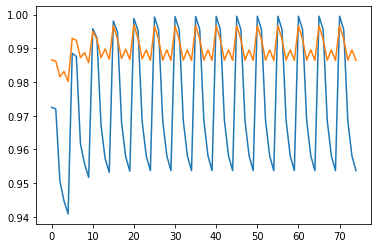

In [324]:
plt.plot(grid_search.r_squared_train)
plt.plot(grid_search.r_squared_val)

```
This periodicity must be due to the min_samples feature. We can see that the optimal min_samples can be set to 11  
and Optimal value for depth can be set to 15
```

> Now show the same results using the RSS version of the algorithm that we are showing as a parallel approach to CART

# Question 2
## KMeans Forest

In [325]:
train_df.head()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
466,-61.714,-25.000,24.143,-49.143,-41.000,-45.429,173790.0
145,-58.714,-6.571,15.143,-41.143,-51.000,-31.143,28606.0
327,-27.429,9.429,11.429,-8.571,-14.857,-12.571,36867.0
433,-48.571,-6.286,20.143,-34.429,-36.000,-37.000,352991.0
247,-32.429,9.429,12.857,-19.429,-41.143,-20.000,55839.0


In [358]:
train_clusters = train_df.iloc[:,:-2]
train_clusters.head()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
466,-61.714,-25.000,24.143,-49.143,-41.000,-45.429
145,-58.714,-6.571,15.143,-41.143,-51.000,-31.143
327,-27.429,9.429,11.429,-8.571,-14.857,-12.571
433,-48.571,-6.286,20.143,-34.429,-36.000,-37.000
247,-32.429,9.429,12.857,-19.429,-41.143,-20.000


In [327]:
#first we have to find the optimal number of clusters for our algorithm
inertia_log = []
for i in range(1,20):
    kmeans = KMeansClustering(i)
    classes, inertia = kmeans.fit(train_clusters)
    inertia_log.append(inertia)

Inertia for K = 1 = 15544.441085832656
Inertia for K = 2 = 8432.081081935354
Inertia for K = 3 = 6409.961611445597
Inertia for K = 4 = 5765.550482219984
Inertia for K = 5 = 5467.461818108828
Inertia for K = 6 = 5422.595917749618
Inertia for K = 7 = 4036.188130101253
Inertia for K = 8 = 3989.4817119626655
Inertia for K = 9 = 3904.236871372222
Inertia for K = 10 = 3853.3854147091643
Inertia for K = 11 = 3833.037110087759
Inertia for K = 12 = 3812.8079868719133
Inertia for K = 13 = 3837.793374568294
Inertia for K = 14 = 3793.2449225092123
Inertia for K = 15 = 3766.862183623548
Inertia for K = 16 = 3789.958003207889
Inertia for K = 17 = 3789.958003207889
Inertia for K = 18 = 3763.6956078964026
Inertia for K = 19 = 3789.958003207889


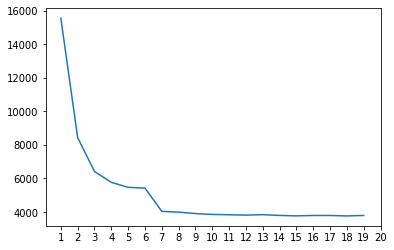

In [328]:
fig = plt.figure()
plt.plot(inertia_log)
plt.xticks(range(20),labels = range(1,21))
plt.savefig('./plots/determine_k_using_elbow_method.png')
plt.show()
plt.close()

> Lets keep K = 6

In [362]:
# for k = 5
K = 7
kmeans = KMeansClustering(K)
classes, inertia = kmeans.fit(train_clusters)
centroids = kmeans.centroids
np.unique(classes, return_counts = True)
train_df['clusterLabel'] = classes

Inertia for K = 7 = 4700.61792971285


In [363]:
centroids.shape, train_clusters.shape

((7, 6), (425, 6))

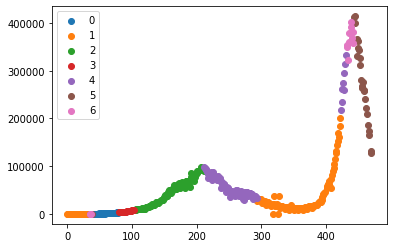

In [364]:
# plt.plot(train_df.sort_index().new_cases, hue = 'clusterLabel')
fig = plt.figure()
for i in range(K):
    s = train_df.loc[train_df['clusterLabel']==i].new_cases
    plt.scatter(s.index, s, label = i) 
plt.legend()
plt.savefig('./plots/clusters presented on new_cases plotted against time')

In [365]:
def randomForest(train_df,K):
    random_forest = dict()
    for i in range(K):
        data = train_df.loc[train_df['clusterLabel']==i].drop(columns = ['clusterLabel'])
        decisionTreeInstance = DecisionTreeRegressor(data, min_samples = 5, max_depth = None)
        tree = decisionTreeInstance.build_tree(data)
        random_forest[i] = [decisionTreeInstance, tree]
    return random_forest

In [366]:
forest = randomForest(train_df, K)

Splitting wrt column 1 and value -46.0715; Std Dev reduced from 936.6550957765188 to 558.5734881227328
Splitting wrt column 4 and value -53.714; Std Dev reduced from 556.9624265971619 to 328.41886805614956
Splitting wrt column 1 and value -47.2145; Std Dev reduced from 260.74552998078155 to 197.23346107337542
Splitting wrt column 5 and value -60.786; Std Dev reduced from 311.98166612799537 to 255.20521879790437
Splitting wrt column 1 and value -46.7855; Std Dev reduced from 101.60995686119217 to 60.68164759569149
Splitting wrt column 0 and value -77.0; Std Dev reduced from 365.63920399760195 to 242.85977002715669
Splitting wrt column 4 and value -49.2145; Std Dev reduced from 151.32158544709415 to 98.13369565150505
Splitting wrt column 3 and value -68.5715; Std Dev reduced from 110.4004076079432 to 73.71604552005773
Splitting wrt column 0 and value -75.857; Std Dev reduced from 317.7546483199351 to 250.0742633027435
Splitting wrt column 4 and value -51.9285; Std Dev reduced from 324.39

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 0 and value -26.6425; Std Dev reduced from 1531.4436272136606 to 1253.4283620537171
Splitting wrt column 1 and value 5.5; Std Dev reduced from 2079.7149439127193 to 1557.19625090253
Splitting wrt column 4 and value -10.6425; Std Dev reduced from 1789.5731955475367 to 1267.8592777387198
Splitting wrt column 4 and value -11.214; Std Dev reduced from 1426.3416874560598 to 1127.9074790291977
Splitting wrt column 2 and value 10.9285; Std Dev reduced from 1289.0371188905117 to 1008.4465782908569
Splitting wrt column 4 and value -11.785499999999999; Std Dev reduced from 666.4252096071996 to 273.0345033141416
Splitting wrt column 2 and value 11.5; Std Dev reduced from 9728.525361819002 to 6191.600348524977
Splitting wrt column 5 and value -13.3575; Std Dev reduced from 7114.231171374972 to 5175.012496340285
Splitting wrt column 3 and value -7.785500000000001; Std Dev reduced from 5606.263537701975 to 1860.4412073782692
Splitting wrt column 4 and value -15.143; Std Dev redu

Splitting wrt column 4 and value -37.2855; Std Dev reduced from 98193.26902078194 to 19218.587379102457
Splitting wrt column 4 and value -43.7855; Std Dev reduced from 5331.576484493119 to 3566.733430111262
Splitting wrt column 2 and value 15.9285; Std Dev reduced from 5139.178579522434 to 4248.434178220729
Splitting wrt column 4 and value -28.143; Std Dev reduced from 36577.350997364134 to 18523.579461582554
Splitting wrt column 5 and value -26.5; Std Dev reduced from 20386.13896352127 to 7330.965634554128
Splitting wrt column 4 and value -42.2855; Std Dev reduced from 98467.36334476719 to 61984.502159332944
Splitting wrt column 1 and value -25.7145; Std Dev reduced from 61901.61936787802 to 30025.155904135907
Splitting wrt column 5 and value -49.0; Std Dev reduced from 27914.09361039688 to 15998.403014976237
Splitting wrt column 3 and value -51.4285; Std Dev reduced from 17245.832274991626 to 7422.721720143756
Splitting wrt column 5 and value -51.0; Std Dev reduced from 8659.84200683

In [367]:
def forest_sample_predict(sample):
    """
    sample should be one row of the pandas dataframe
    """
    input_values = sample[:-1].values
    clusterLabel = np.argmin(np.sum((centroids - input_values)**2 , axis = 1, keepdims = 1))
    class_object = forest[clusterLabel][0]
    tree_object = forest[clusterLabel][1]
    prediction = class_object.predict_sample(sample, tree_object)
    return prediction

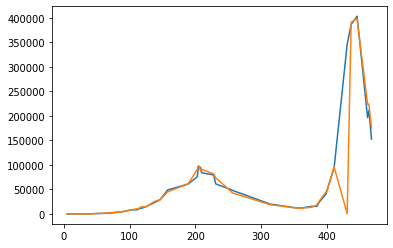

In [369]:
predicted = test_df.apply(forest_sample_predict, axis = 1, args = ())
actual = test_df.iloc[:,-1]
plt.plot(actual.sort_index())
plt.plot(predicted.sort_index())


In [370]:
def R2_score(predicted_values, actual_values):
        correlation_matrix = np.corrcoef(predicted_values, actual_values)
        correlation_xy = correlation_matrix[0,1]
        r_squared = correlation_xy**2
        return r_squared
R2_score(predicted, actual)

0.7797173299308264